# Dependencies 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import cv2 # image processing
import matplotlib.image as mpimg # plotting images

# Data Import and Quality Check 

In [2]:
# Read in training data
train_df = pd.read_csv('../input/happy-whale-and-dolphin/train.csv')
train_df.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


## Spelling mistakes 

In [3]:
# Find the unique species names
sp_list = train_df.species.value_counts().sort_values()
sorted(sp_list.index)

['beluga',
 'blue_whale',
 'bottlenose_dolphin',
 'bottlenose_dolpin',
 'brydes_whale',
 'commersons_dolphin',
 'common_dolphin',
 'cuviers_beaked_whale',
 'dusky_dolphin',
 'false_killer_whale',
 'fin_whale',
 'frasiers_dolphin',
 'globis',
 'gray_whale',
 'humpback_whale',
 'kiler_whale',
 'killer_whale',
 'long_finned_pilot_whale',
 'melon_headed_whale',
 'minke_whale',
 'pantropic_spotted_dolphin',
 'pilot_whale',
 'pygmy_killer_whale',
 'rough_toothed_dolphin',
 'sei_whale',
 'short_finned_pilot_whale',
 'southern_right_whale',
 'spinner_dolphin',
 'spotted_dolphin',
 'white_sided_dolphin']

In [4]:
# Correct spelling mistakes in species names
train_df.species = train_df.species.replace({'bottlenose_dolpin':'bottlenose_dolphin', 'kiler_whale':'killer_whale'})

### The case of pilot whales

Pilot whales have two species: 'long_finned-pilot_whale' and 'short_finned_pilot_whales'. 'globis' and 'pilot_whale' point to the same genus but are not species specific. There are two options: 

- Build a model to specify species in genus specific observations
- Drop genus specific observations and keep species level ones

I detail both but comment the first one out.

In [5]:
##### Build a model to specify species in genus specific observations

# # Make a df for each of pilot whale species_id's
# globis_df = train_df.iloc[np.where(train_df.species == 'globis')]
# pilot_df = train_df.iloc[np.where(train_df.species == 'pilot_whale')]
# long_fin_df = train_df.iloc[np.where(train_df.species == 'long_finned_pilot_whale')]
# short_fin_df = train_df.iloc[np.where(train_df.species == 'short_finned_pilot_whale')]

# # Concat into a big_df for possible later use
# globicephala = pd.concat([globis_df, pilot_df, long_fin_df, short_fin_df], axis = 0)
# globicephala.species = globicephala.species.replace('globis', 'pilot_whale') # replace globis with family common name

In [6]:
##### Drop pilot_whale and globis from train_df because they are representative of family rather than species level

clean_train_df = train_df.loc[(train_df.species != 'globis') & (train_df.species != 'pilot_whale')].copy()
sorted(clean_train_df.species.unique()) # we have 26 species in the data now, not 30

['beluga',
 'blue_whale',
 'bottlenose_dolphin',
 'brydes_whale',
 'commersons_dolphin',
 'common_dolphin',
 'cuviers_beaked_whale',
 'dusky_dolphin',
 'false_killer_whale',
 'fin_whale',
 'frasiers_dolphin',
 'gray_whale',
 'humpback_whale',
 'killer_whale',
 'long_finned_pilot_whale',
 'melon_headed_whale',
 'minke_whale',
 'pantropic_spotted_dolphin',
 'pygmy_killer_whale',
 'rough_toothed_dolphin',
 'sei_whale',
 'short_finned_pilot_whale',
 'southern_right_whale',
 'spinner_dolphin',
 'spotted_dolphin',
 'white_sided_dolphin']

In [7]:
# Read in data gathered here: https://www.kaggle.com/datasets/chasset/happywhalespeciesclassification?select=species.csv
# on species taxonomy
taxonomy = pd.read_csv('../input/happywhalespeciesclassification/species.csv')
taxonomy.drop(columns = ['wikipedia', 'image', 'size', 'specy', 'infraorder'], axis = 1, inplace = True) # drop columns except family and genus

In [8]:
# Correct taxonomy table to represent both species of globis
taxonomy.loc[taxonomy.specy_id == 'pilot_whale', 'specy_id'] = 'long_finned_pilot_whale'
# Correct taxonomy table to be consistent casing
taxonomy.loc[taxonomy.specy_id == 'bottlenose_dolphin', 'genus'] = 'Tursiops' # not 'tursiops'

In [9]:
taxonomy.sort_values('family')

,specy_id,family,genus
12,southern_right_whale,Balaenidae,Eubalaena
2,humpback_whale,Balaenopteridae,Megaptera
3,blue_whale,Balaenopteridae,Balaenoptera
20,brydes_whale,Balaenopteridae,Balaenoptera
8,minke_whale,Balaenopteridae,Balaenoptera
10,fin_whale,Balaenopteridae,Balaenoptera
11,gray_whale,Balaenopteridae,Eschrichtius
14,sei_whale,Balaenopteridae,Balaenoptera
23,pygmy_killer_whale,Delphinidae,Feresa
22,commersons_dolphin,Delphinidae,Cephalorhynchus


In [10]:
# Turn the taxonomy into a dictionary so the training data can be mapped from it
taxonomy_dic = taxonomy.set_index('specy_id').to_dict('index')
taxonomy_dic

{'bottlenose_dolphin': {'family': 'Delphinidae', 'genus': 'Tursiops'},
 'beluga': {'family': 'Monodontidae', 'genus': 'Delphinapterus'},
 'humpback_whale': {'family': 'Balaenopteridae', 'genus': 'Megaptera'},
 'blue_whale': {'family': 'Balaenopteridae', 'genus': 'Balaenoptera'},
 'false_killer_whale': {'family': 'Delphinidae', 'genus': 'Pseudorca'},
 'dusky_dolphin': {'family': 'Delphinidae', 'genus': 'Lagenorhynchus'},
 'spinner_dolphin': {'family': 'Delphinidae', 'genus': 'Stenella'},
 'melon_headed_whale': {'family': 'Delphinidae', 'genus': 'Peponocephala'},
 'minke_whale': {'family': 'Balaenopteridae', 'genus': 'Balaenoptera'},
 'killer_whale': {'family': 'Delphinidae', 'genus': 'Orcinus'},
 'fin_whale': {'family': 'Balaenopteridae', 'genus': 'Balaenoptera'},
 'gray_whale': {'family': 'Balaenopteridae', 'genus': 'Eschrichtius'},
 'southern_right_whale': {'family': 'Balaenidae', 'genus': 'Eubalaena'},
 'spotted_dolphin': {'family': 'Delphinidae', 'genus': 'Stenella'},
 'sei_whale': 

In [11]:
# Map dictionary to training data - include family and genus for every observation
clean_train_df['family'] = clean_train_df['species'].apply(lambda x: taxonomy_dic[x]['family'])
clean_train_df['genus'] = clean_train_df['species'].apply(lambda x: taxonomy_dic[x]['genus'])

In [12]:
clean_train_df.head()

# looking good! Each observation has a family and genus that has been discovered from investigating the species

,image,species,individual_id,family,genus
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,Delphinidae,Peponocephala
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,Balaenopteridae,Megaptera
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,Delphinidae,Pseudorca
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,Delphinidae,Tursiops
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,Balaenopteridae,Megaptera


In [13]:
# Number of observations per species, family and genus
for column in ['species', 'family', 'genus']:
    print('################# '+column+' #################')
    print(clean_train_df[column].value_counts().sort_index())
    print()

################# species #################
beluga                        7443
blue_whale                    4830
bottlenose_dolphin           10781
brydes_whale                   154
commersons_dolphin              90
common_dolphin                 347
cuviers_beaked_whale           341
dusky_dolphin                 3139
false_killer_whale            3326
fin_whale                     1324
frasiers_dolphin                14
gray_whale                    1123
humpback_whale                7392
killer_whale                  2455
long_finned_pilot_whale        238
melon_headed_whale            1689
minke_whale                   1608
pantropic_spotted_dolphin      145
pygmy_killer_whale              76
rough_toothed_dolphin           60
sei_whale                      428
short_finned_pilot_whale       367
southern_right_whale           866
spinner_dolphin               1700
spotted_dolphin                490
white_sided_dolphin            229
Name: species, dtype: int64

#################

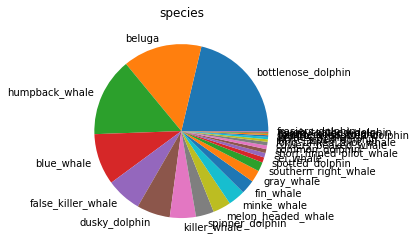

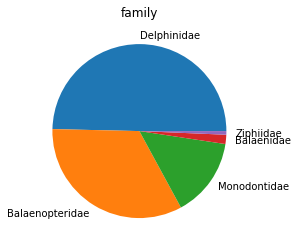

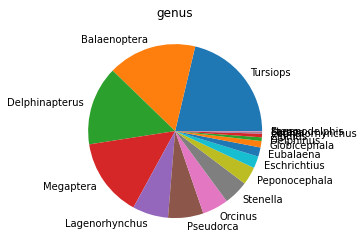

In [14]:
# Pie chart of counts per species, family and genus
for column in ['species', 'family', 'genus']:
    stats = clean_train_df[column].value_counts()
    plt.pie(stats, labels = stats.index)
    plt.title(column)
    plt.show()

In [15]:
# Summary table of taxonomy. Of interest: how many species there are per family. 
summary_taxonomy = clean_train_df.groupby('family')['species'].agg(['count', 'unique'])
summary_taxonomy.columns = ['count', 'unique_sp']
summary_taxonomy['len_unique_sp'] = summary_taxonomy['unique_sp'].apply(len)
summary_taxonomy

,count,unique_sp,len_unique_sp
family,,,
Balaenidae,866,[southern_right_whale],1
Balaenopteridae,16859,"[humpback_whale, minke_whale, fin_whale, blue_...",7
Delphinidae,25146,"[melon_headed_whale, false_killer_whale, bottl...",16
Monodontidae,7443,[beluga],1
Ziphiidae,341,[cuviers_beaked_whale],1


In [16]:
def get_red_img_array(df):
    """
    Get the array of a single image given a row in a data frame
    """
    img = cv2.imread('../input/happy-whale-and-dolphin/train_images/'+df.image, cv2.IMREAD_UNCHANGED)
    new_img = cv2.resize(img, (356, 356), interpolation = cv2.INTER_AREA)
    new_img = cv2.applyColorMap(new_img, cv2.COLORMAP_JET)
#     new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    return new_img

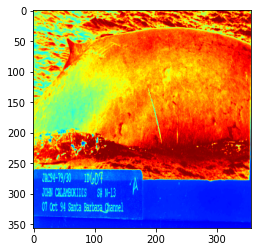

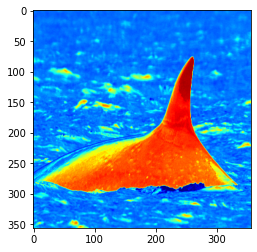

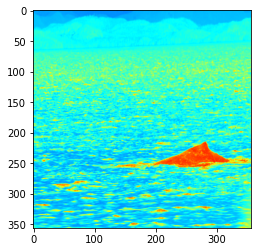

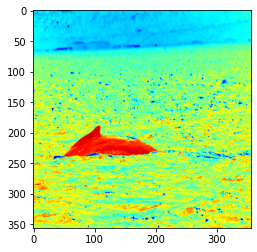

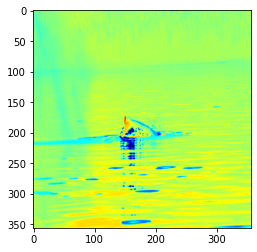

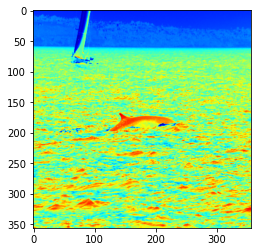

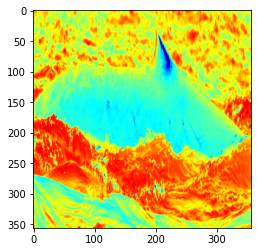

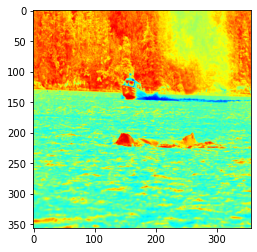

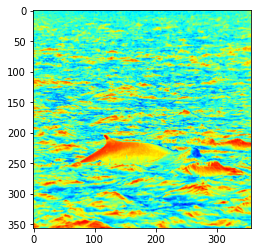

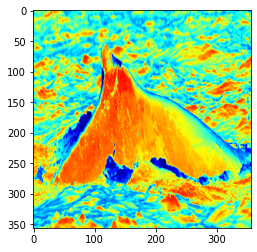

In [17]:
# Subset example balaenopteridae
test_balanae = clean_train_df.loc[clean_train_df['family'] == 'Balaenopteridae'].sample(10).copy()
test_balanae['img_array'] = test_balanae.apply(get_red_img_array, axis = 1)

# Look at image arrays
for index in test_balanae.index:
    plt.imshow(test_balanae.img_array[index])
    plt.show()

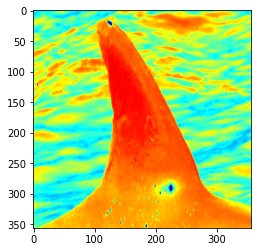

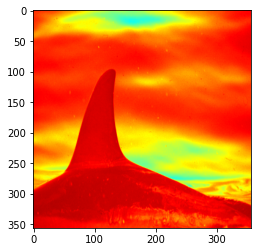

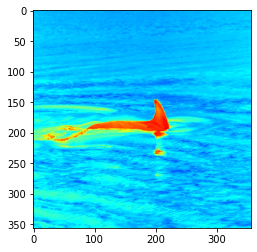

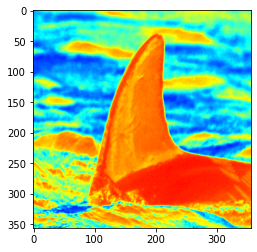

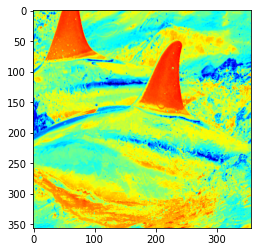

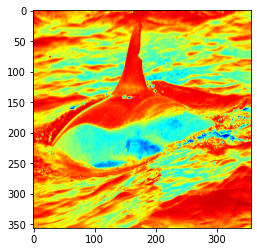

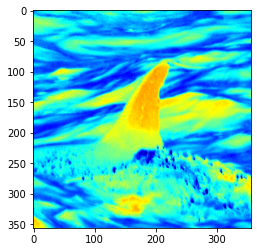

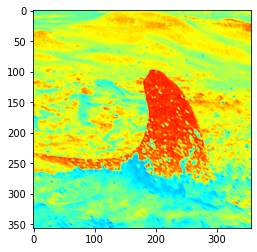

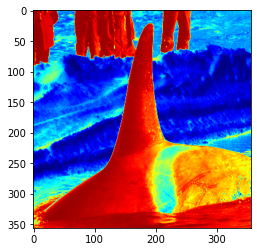

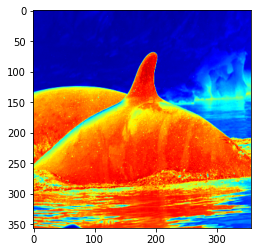

In [18]:
# Subset example delphinidae
test_delphi = clean_train_df.loc[clean_train_df['family'] == 'Delphinidae'].sample(10).copy()
test_delphi['img_array'] = test_delphi.apply(get_red_img_array, axis = 1)

# Look at image arrays
for index in test_delphi.index:
    plt.imshow(test_delphi.img_array[index])
    plt.show()

In [19]:
# Check what colour scheme works best -----> cv2.COLORMAP_JET
# for index in test_balanae.index:
#     img = cv2.imread('../input/happy-whale-and-dolphin/train_images/'+test_balanae.image[index], cv2.IMREAD_UNCHANGED)
#     new_img = cv2.resize(img, (356, 356), interpolation = cv2.INTER_AREA)
#     print('##### '+str(index)+' ######')
#     good_colors = [2, 8, 19, 20]
#     for color_index in range(1,len(good_colors)+1):
#         new_img = cv2.applyColorMap(new_img, good_colors[color_index-1])
#         plt.subplot(1, 4, color_index)
#         plt.imshow(new_img)
#         plt.title('COLOUR: '+str(good_colors[color_index-1]))   
#     plt.show()

In [20]:
# Making a sample dataset to play with. It will have 341 samples for each of the 5 families.
sampled_families = pd.DataFrame()

for fam in clean_train_df['family'].unique(): # Iterate through families and sample 341 observations each
    fam_subset = clean_train_df.loc[clean_train_df['family'] == fam].sample(341).copy()
    sampled_families = pd.concat([sampled_families, fam_subset], axis = 0)
    
sampled_families['img_array'] = sampled_families.apply(get_red_img_array, axis = 1)
sampled_families.head()

,image,species,individual_id,family,genus,img_array
39093,c4839d72e9b26a.jpg,dusky_dolphin,840f604cf0cd,Delphinidae,Lagenorhynchus,"[[[42, 255, 214], [46, 255, 210], [54, 255, 20..."
18076,5b23bfa464653f.jpg,false_killer_whale,f7bb4f9a9d1a,Delphinidae,Pseudorca,"[[[0, 184, 255], [0, 192, 255], [0, 200, 255],..."
50469,fd22cd692e12c4.jpg,bottlenose_dolphin,cedc801cee3f,Delphinidae,Tursiops,"[[[0, 128, 255], [0, 128, 255], [0, 124, 255],..."
8004,281ee0eb6a1ef4.jpg,false_killer_whale,4b9bc905af99,Delphinidae,Pseudorca,"[[[34, 255, 222], [38, 255, 218], [50, 255, 20..."
40858,cd89171824542b.jpg,bottlenose_dolphin,480677e8cf20,Delphinidae,Tursiops,"[[[0, 236, 255], [0, 252, 255], [10, 255, 246]..."


In [21]:
# Making a sample dataset to play with. It will have 200 samples for each of the species with more than 200 samples available.
sampled_species = pd.DataFrame()

for sp in clean_train_df['species'].unique(): # Iterate through species and sample 200 observations each
    sp_subset = clean_train_df.loc[clean_train_df['species'] == sp].copy()
    if len(sp_subset) >= 200:
        sp_subset = sp_subset.sample(200).copy()
        sampled_species = pd.concat([sampled_species, sp_subset], axis = 0)
    else: print(sp+' was not included in the final df') # species with less than 200 observations are not included in the sampled df
    
sampled_species['img_array'] = sampled_species.apply(get_red_img_array, axis = 1)
sampled_species.head()

brydes_whale was not included in the final df
commersons_dolphin was not included in the final df
rough_toothed_dolphin was not included in the final df
pantropic_spotted_dolphin was not included in the final df
pygmy_killer_whale was not included in the final df
frasiers_dolphin was not included in the final df


,image,species,individual_id,family,genus,img_array
45150,e2d76ba1ce0563.jpg,melon_headed_whale,403452688494,Delphinidae,Peponocephala,"[[[118, 255, 138], [106, 255, 150], [90, 255, ..."
16288,524e60b631e6b4.jpg,melon_headed_whale,e9ab9f79c99e,Delphinidae,Peponocephala,"[[[255, 224, 0], [255, 228, 0], [255, 228, 0],..."
42464,d536e86af113d2.jpg,melon_headed_whale,4a73d5164eda,Delphinidae,Peponocephala,"[[[186, 255, 70], [186, 255, 70], [190, 255, 6..."
30596,99cb444116254c.jpg,melon_headed_whale,4564403b92cc,Delphinidae,Peponocephala,"[[[0, 184, 255], [0, 188, 255], [0, 184, 255],..."
44064,dd31d6ec9f1ffc.jpg,melon_headed_whale,70e7a6b15d95,Delphinidae,Peponocephala,"[[[0, 120, 255], [0, 144, 255], [0, 152, 255],..."


In [22]:
# def check_img(df_row):
#       """
#       Function to check img array against image - sanity check and code testing
#       """
#     plt.subplot(1,2,1)
#     plt.imshow(mpimg.imread('../input/happy-whale-and-dolphin/train_images/'+df_row.image))
#     plt.title('img_array of '+df_row.species)
    
#     plt.subplot(1,2,2)
#     plt.imshow(df_row.img_array)
#     plt.title('img_array of '+df_row.species)
#     plt.show()
    
# check_img(sampled_species.reset_index(drop=True).loc[600,])
# check_img(sampled_families.reset_index(drop=True).loc[600,])

In [ ]:
# Pickle sampled data frames ready for modelling